# K-NN from scratch 

### I created a function called k_NN which accepts feature set, corresponding labels and explicitly decided k and return predicted classes for test instances and test accuracy

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

XION=np.genfromtxt("ionosphere.txt",delimiter=",",usecols=np.arange(34))
yION=np.genfromtxt("ionosphere.txt",delimiter=",",usecols=34)

def k_NN(X,y,k):
    """function calculates the predicted classes 
        of test set and test accuracy given k"""
    
    def distance(x,y):
        """function calculating Euclidean 
            distance between two points"""
        return (((x-y)**2).sum())**0.5
    
    #Split the dataset
    X_tr,X_t,y_tr,y_t=train_test_split(X,y,random_state=0)
    
    #Creating a 2 dimensional array showing the distance of each test instance to the each training instance
    dist_matr=np.zeros((len(X_t),len(X_tr)))
    for i in range(len(X_t)):
        for j in range(len(X_tr)):
            dist_matr[i,j]=distance(X_t[i],X_tr[j])
    
    #Predicting the labels of test observations based on k-nearest training observations
    nearest_neighbours=np.argsort(dist_matr)
    predicted=np.array([])
    for i in range(len(nearest_neighbours)):
        nearest_k_classes=[y_tr[ind] for ind in nearest_neighbours[i][:k]]
        if sum(nearest_k_classes)>=1 or sum(nearest_k_classes)==0:
            predicted=np.append(predicted,1)
        elif sum(nearest_k_classes)<=-1:
            predicted=np.append(predicted,-1)
    
    T=Counter(predicted==y_t)[1]
    F=Counter(predicted==y_t)[0]
    accuracy=(T*100)/(T+F)
    
    return predicted,accuracy

predicted_classes,accuracy=k_NN(XION,yION,3)

88.63636363636364

## Observing test accuracy for various K values

No handles with labels found to put in legend.


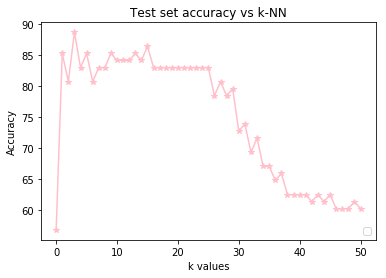

In [134]:
acc=[]
for k in range(51):
    _,accuracy=k_NN(XION,yION,k)
    acc.append(accuracy)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(list(range(51)),acc,c='pink',marker='*')
plt.legend(loc='lower right');
ax.set_title("Test set accuracy vs k-NN")
ax.set_xlabel('k values')
ax.set_ylabel('Accuracy')
plt.show()

#### As can be seen from the above graph increasing k eventually decreases the accuracy on test set. 